In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('final_dataset.csv')
df.head(20)

,CoC Number,CoC Name,CoC Category,Count Types,Homelessness.Type,Count,Year
0,AK-500,Anchorage CoC,Other Largely Urban CoC,NaN,Overall.Homeless,974,2007
1,AK-500,Anchorage CoC,Other Largely Urban CoC,NaN,Sheltered.Total.Homeless,842,2007
2,AK-500,Anchorage CoC,Other Largely Urban CoC,NaN,Unsheltered.Homeless,132,2007
3,AK-500,Anchorage CoC,Other Largely Urban CoC,NaN,Overall.Homeless.Individuals,696,2007
4,AK-500,Anchorage CoC,Other Largely Urban CoC,NaN,Overall.Homeless.People.in.Families,278,2007
5,AK-501,Alaska Balance of State CoC,Largely Rural CoC,NaN,Overall.Homeless,668,2007
6,AK-501,Alaska Balance of State CoC,Largely Rural CoC,NaN,Sheltered.Total.Homeless,545,2007
7,AK-501,Alaska Balance of State CoC,Largely Rural CoC,NaN,Unsheltered.Homeless,123,2007
8,AK-501,Alaska Balance of State CoC,Largely Rural CoC,NaN,Overall.Homeless.Individuals,366,2007
9,AK-501,Alaska Balance of State CoC,Largely Rural CoC,NaN,Overall.Homeless.People.in.Families,302,2007


In [3]:
df.shape

(32580, 7)

In [4]:
df.isnull().sum()

CoC Number              0
CoC Name                0
CoC Category          355
Count Types          3890
Homelessness.Type       0
Count                   0
Year                    0
dtype: int64

In [83]:
df['Count Types'].value_counts()

Count Types
Sheltered and Unsheltered Count            24895
Sheltered-Only Count                        2885
No 2010 PIT Count                            425
Sheltered and Partial Unsheltered Count      375
Sheltered-Only Count*                        110
Name: count, dtype: int64

In [6]:
df['CoC Category'].value_counts()

CoC Category
Largely Suburban CoC       14065
Largely Rural CoC           9130
Other Largely Urban CoC     4865
Major City CoC              4165
Name: count, dtype: int64

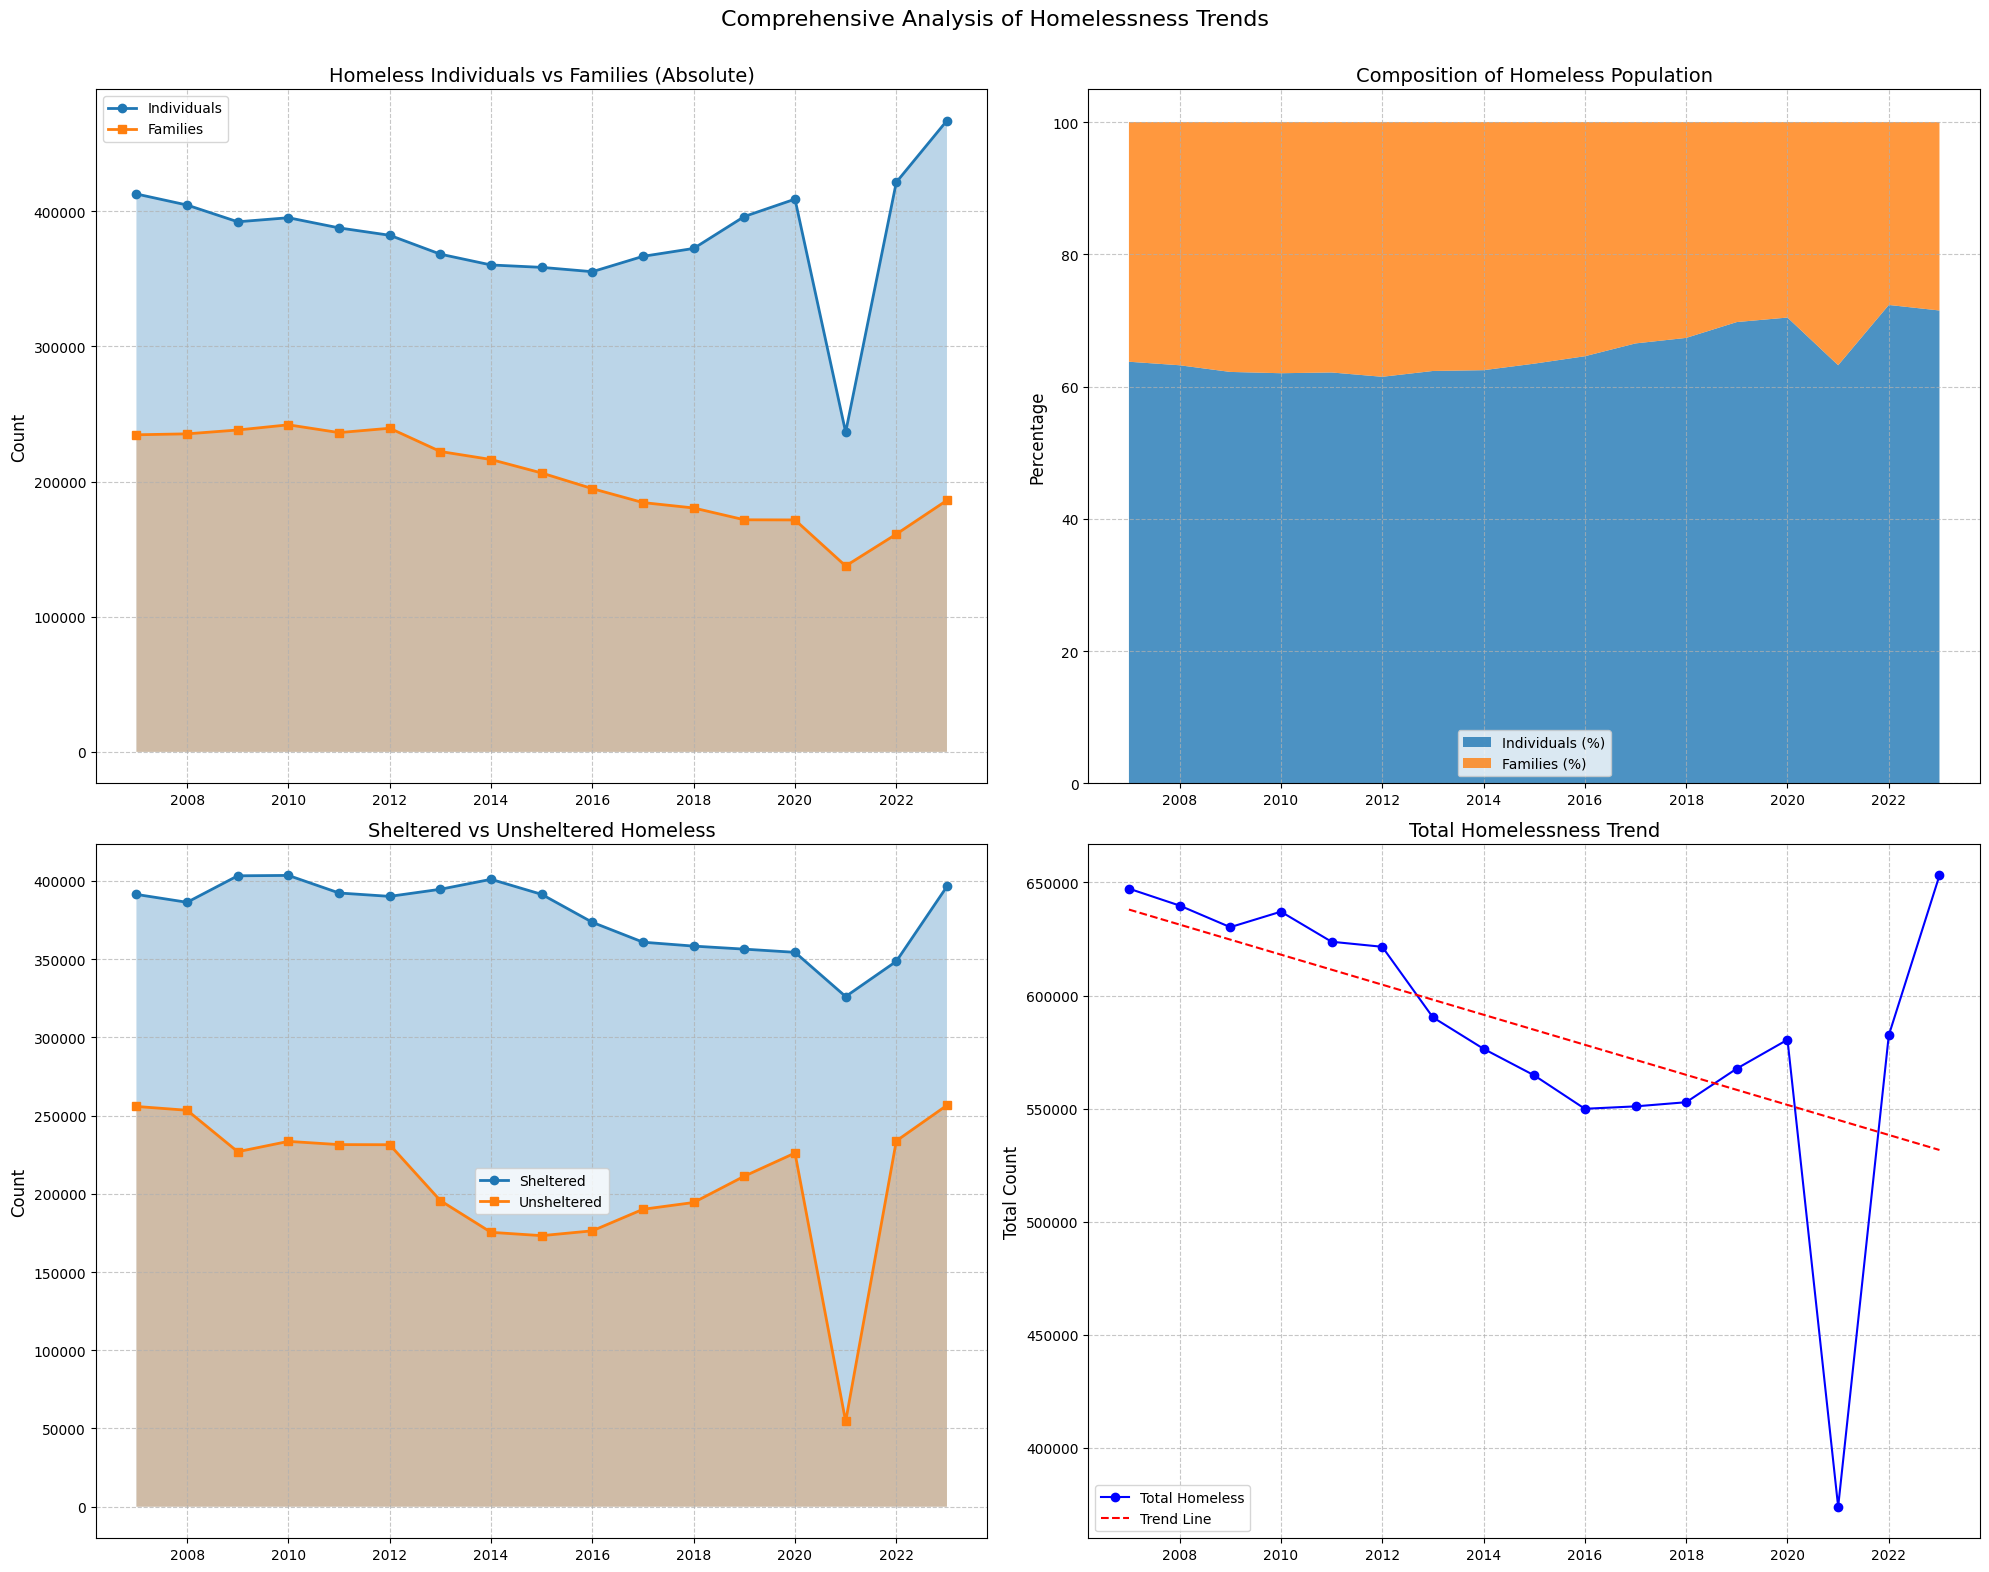

Average annual change in total homelessness: 365.38
Correlation between individuals and families: 0.33
Percentage change in homelessness from 2007 to 2023: 0.90%
Year with highest homelessness: 2023
Year with lowest homelessness: 2021


In [137]:
from scipy import stats

individuals = df[df['Homelessness.Type'] == 'Overall.Homeless.Individuals'].groupby('Year')['Count'].sum()
families = df[df['Homelessness.Type'] == 'Overall.Homeless.People.in.Families'].groupby('Year')['Count'].sum()
sheltered = df[df['Homelessness.Type'] == 'Sheltered.Total.Homeless'].groupby('Year')['Count'].sum()
unsheltered = df[df['Homelessness.Type'] == 'Unsheltered.Homeless'].groupby('Year')['Count'].sum()

total = individuals + families
individuals_pct = individuals / total * 100
families_pct = families / total * 100
sheltered_pct = sheltered / (sheltered + unsheltered) * 100
unsheltered_pct = unsheltered / (sheltered + unsheltered) * 100

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comprehensive Analysis of Homelessness Trends', fontsize=16)

ax1.plot(individuals.index, individuals.values, marker='o', linewidth=2, label='Individuals')
ax1.plot(families.index, families.values, marker='s', linewidth=2, label='Families')
ax1.fill_between(individuals.index, individuals.values, alpha=0.3)
ax1.fill_between(families.index, families.values, alpha=0.3)
ax1.set_title('Homeless Individuals vs Families (Absolute)', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.stackplot(individuals_pct.index, individuals_pct.values, families_pct.values, 
              labels=['Individuals (%)', 'Families (%)'], alpha=0.8)
ax2.set_title('Composition of Homeless Population', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

ax3.plot(sheltered.index, sheltered.values, marker='o', linewidth=2, label='Sheltered')
ax3.plot(unsheltered.index, unsheltered.values, marker='s', linewidth=2, label='Unsheltered')
ax3.fill_between(sheltered.index, sheltered.values, alpha=0.3)
ax3.fill_between(unsheltered.index, unsheltered.values, alpha=0.3)
ax3.set_title('Sheltered vs Unsheltered Homeless', fontsize=14)
ax3.set_ylabel('Count', fontsize=12)
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

years = individuals.index.values
total_homeless = individuals.values + families.values
z = np.polyfit(years, total_homeless, 1)
p = np.poly1d(z)
ax4.plot(years, total_homeless, 'bo-', label='Total Homeless')
ax4.plot(years, p(years), "r--", label='Trend Line')
ax4.set_title('Total Homelessness Trend', fontsize=14)
ax4.set_ylabel('Total Count', fontsize=12)
ax4.legend()
ax4.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.93)

plt.show()

print(f"Average annual change in total homelessness: {np.mean(np.diff(total_homeless)):.2f}")
print(f"Correlation between individuals and families: {stats.pearsonr(individuals, families)[0]:.2f}")
print(f"Percentage change in homelessness from {years[0]} to {years[-1]}: {((total_homeless[-1] - total_homeless[0]) / total_homeless[0] * 100):.2f}%")
print(f"Year with highest homelessness: {years[np.argmax(total_homeless)]}")
print(f"Year with lowest homelessness: {years[np.argmin(total_homeless)]}")

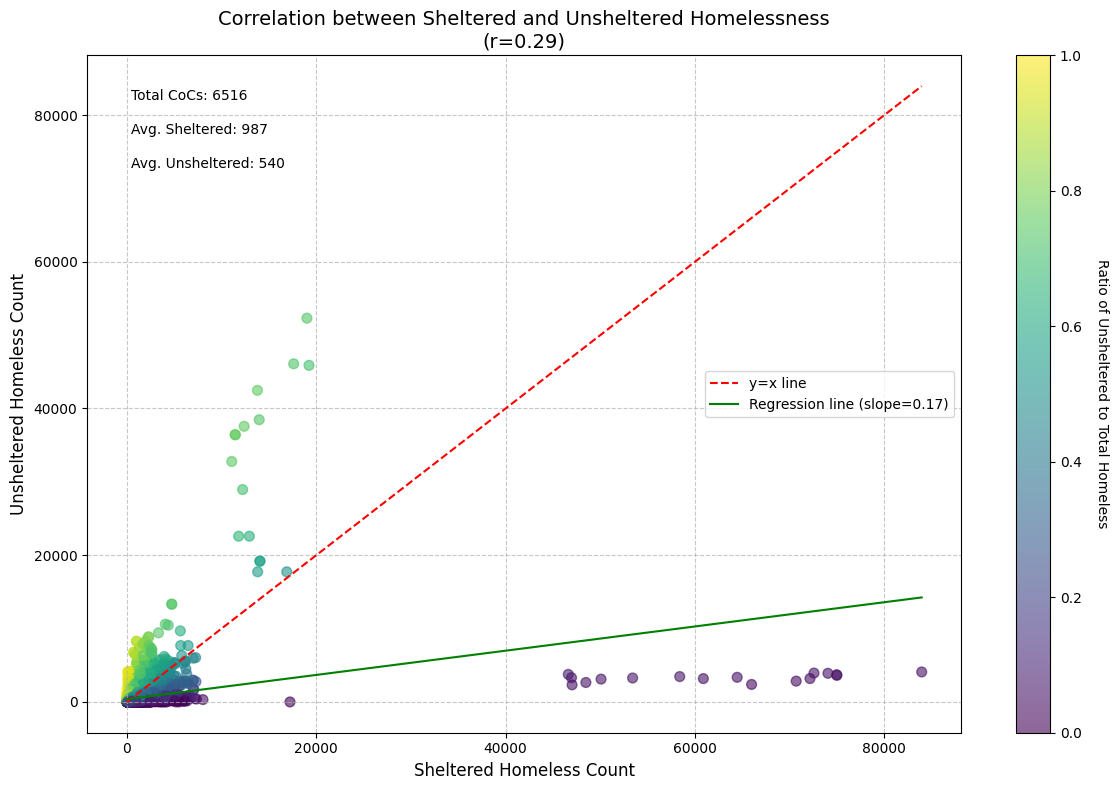

Correlation coefficient: 0.29
Regression slope: 0.17
Regression intercept: 377.26
R-squared value: 0.09
P-value: 0.0000
Average unsheltered ratio: 0.28
CoC with highest unsheltered ratio: Colusa, Glenn, Trinity Counties CoC (1.00)
CoC with lowest unsheltered ratio: St. Joseph/Andrew, Buchanan, DeKalb Counties CoC (0.00)


In [140]:
sheltered_counts = df[df['Homelessness.Type'] == 'Sheltered.Total.Homeless']
unsheltered_counts = df[df['Homelessness.Type'] == 'Unsheltered.Homeless']

correlation_df = sheltered_counts[['CoC Name', 'Count', 'Year']].merge(
    unsheltered_counts[['CoC Name', 'Count', 'Year']], 
    on=['CoC Name', 'Year'], 
    suffixes=('_sheltered', '_unsheltered')
)

correlation = correlation_df['Count_sheltered'].corr(correlation_df['Count_unsheltered'])

correlation_df['Unsheltered_Ratio'] = correlation_df['Count_unsheltered'] / (correlation_df['Count_sheltered'] + correlation_df['Count_unsheltered'])

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(correlation_df['Count_sheltered'], 
                     correlation_df['Count_unsheltered'],
                     c=correlation_df['Unsheltered_Ratio'],
                     cmap='viridis',
                     alpha=0.6,
                     s=50)

cbar = plt.colorbar(scatter)
cbar.set_label('Ratio of Unsheltered to Total Homeless', rotation=270, labelpad=20)

ax.set_xlabel('Sheltered Homeless Count', fontsize=12)
ax.set_ylabel('Unsheltered Homeless Count', fontsize=12)
ax.set_title(f'Correlation between Sheltered and Unsheltered Homelessness\n(r={correlation:.2f})', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)

max_count = max(correlation_df['Count_sheltered'].max(), correlation_df['Count_unsheltered'].max())
ax.plot([0, max_count], [0, max_count], 'r--', label='y=x line')

ax.text(0.05, 0.95, f'Total CoCs: {len(correlation_df)}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.text(0.05, 0.90, f'Avg. Sheltered: {correlation_df["Count_sheltered"].mean():.0f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.text(0.05, 0.85, f'Avg. Unsheltered: {correlation_df["Count_unsheltered"].mean():.0f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')

slope, intercept, r_value, p_value, std_err = stats.linregress(correlation_df['Count_sheltered'], correlation_df['Count_unsheltered'])
line = slope * np.array([0, max_count]) + intercept
ax.plot([0, max_count], line, 'g-', label=f'Regression line (slope={slope:.2f})')

ax.legend()

plt.tight_layout()
plt.show()


print(f"Correlation coefficient: {correlation:.2f}")
print(f"Regression slope: {slope:.2f}")
print(f"Regression intercept: {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Average unsheltered ratio: {correlation_df['Unsheltered_Ratio'].mean():.2f}")
print(f"CoC with highest unsheltered ratio: {correlation_df.loc[correlation_df['Unsheltered_Ratio'].idxmax(), 'CoC Name']} ({correlation_df['Unsheltered_Ratio'].max():.2f})")
print(f"CoC with lowest unsheltered ratio: {correlation_df.loc[correlation_df['Unsheltered_Ratio'].idxmin(), 'CoC Name']} ({correlation_df['Unsheltered_Ratio'].min():.2f})")

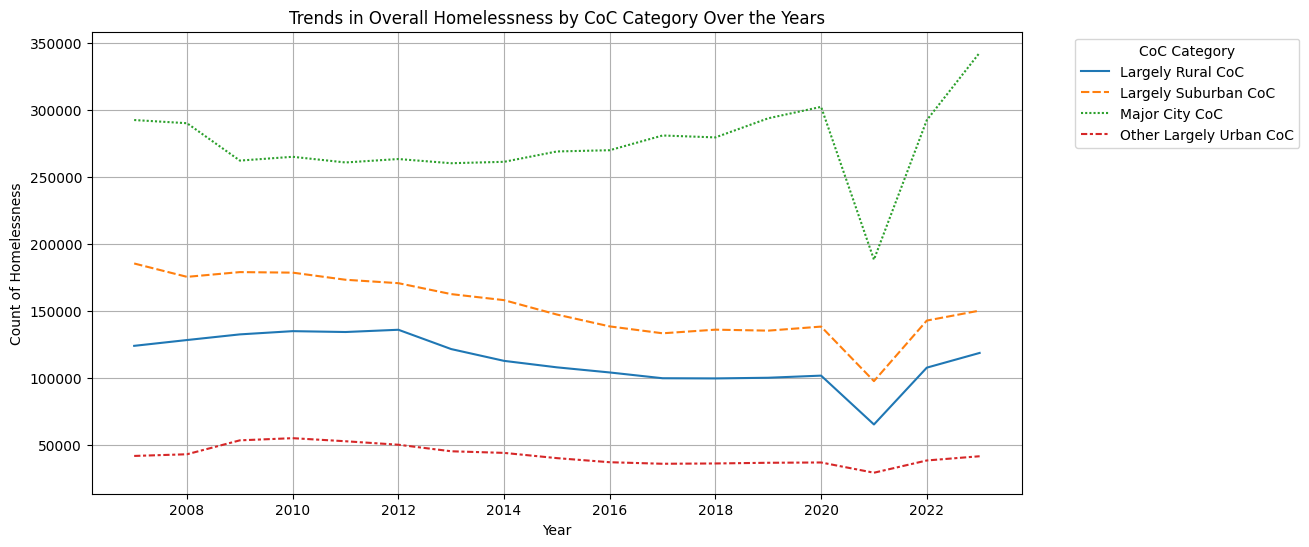

In [138]:
overall_homeless = df[df['Homelessness.Type'] == 'Overall.Homeless']

# Pivot the data for time series analysis
time_series_data = overall_homeless.pivot_table(values='Count', index='Year', columns='CoC Category', aggfunc='sum')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data)
plt.title('Trends in Overall Homelessness by CoC Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Homelessness')
plt.legend(title='CoC Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

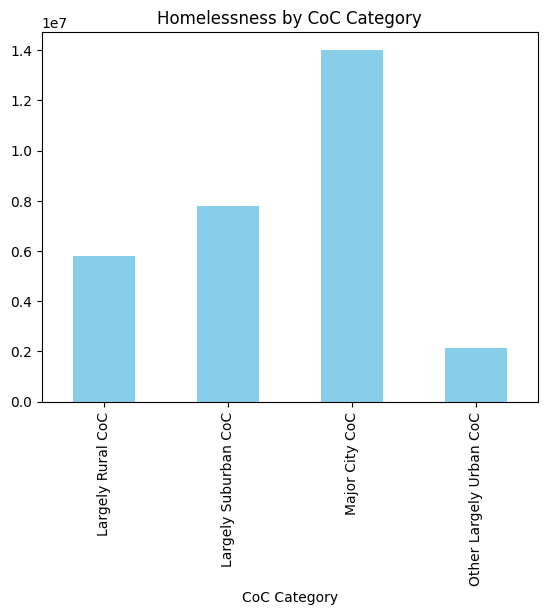

In [79]:
category_group = df.groupby('CoC Category')['Count'].sum()
category_group.plot(kind='bar', color='skyblue', title='Homelessness by CoC Category') 
plt.show()

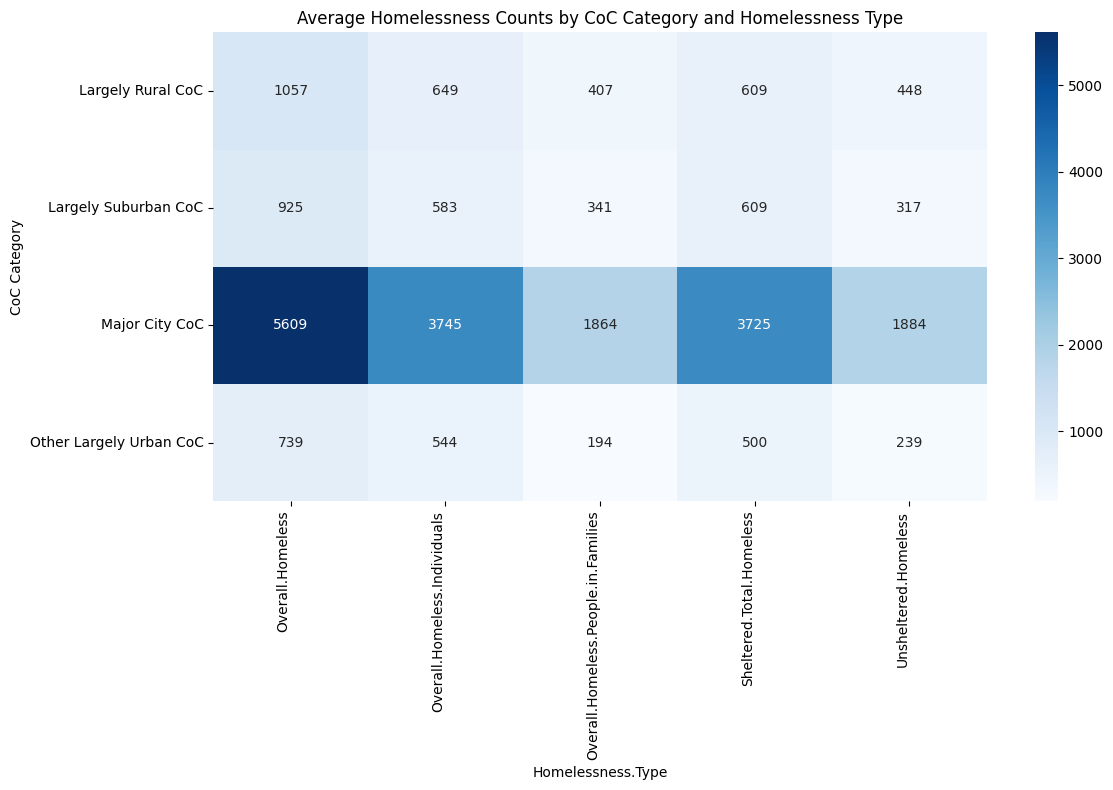

In [94]:
pivot = df.pivot_table(values='Count', index='CoC Category', 
                       columns='Homelessness.Type', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt='.0f')
plt.title('Average Homelessness Counts by CoC Category and Homelessness Type')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

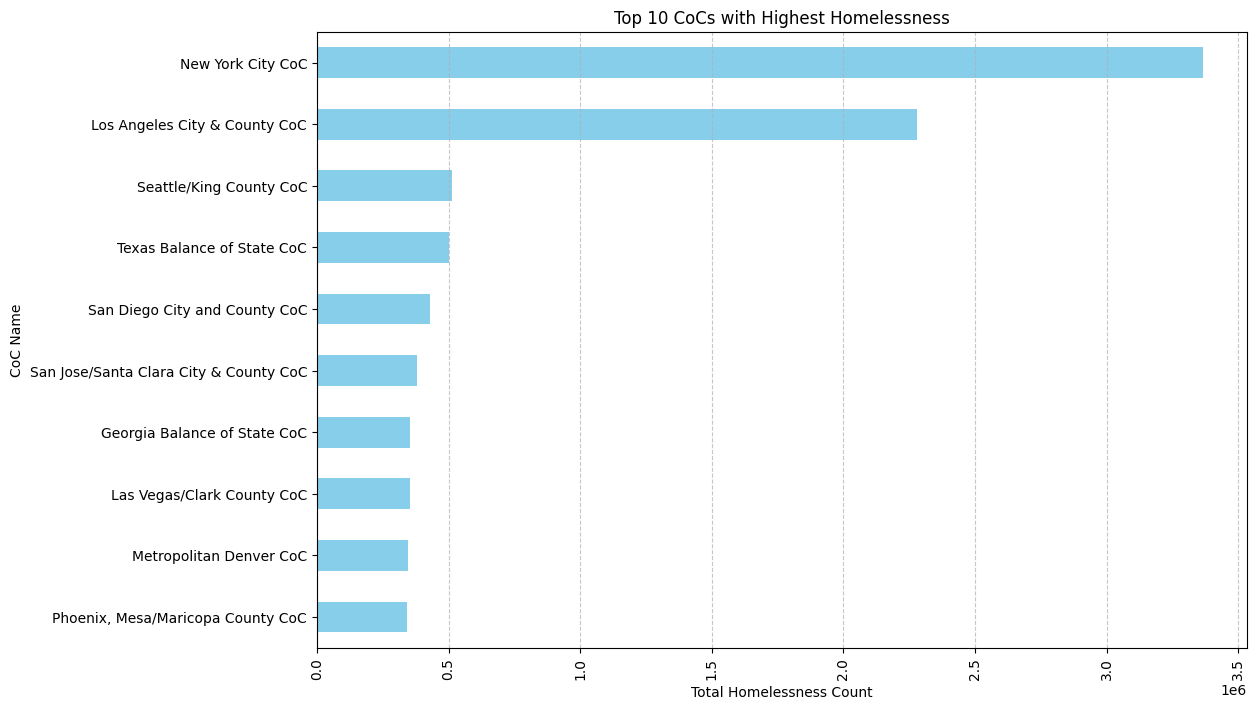

In [106]:
top_cocs = df.groupby('CoC Name')['Count'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_cocs.sort_values(ascending=True).plot(kind='barh', color='skyblue', title='Top 10 CoCs with Highest Homelessness')
plt.xlabel('Total Homelessness Count')  
plt.ylabel('CoC Name')  
plt.xticks(rotation=90)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

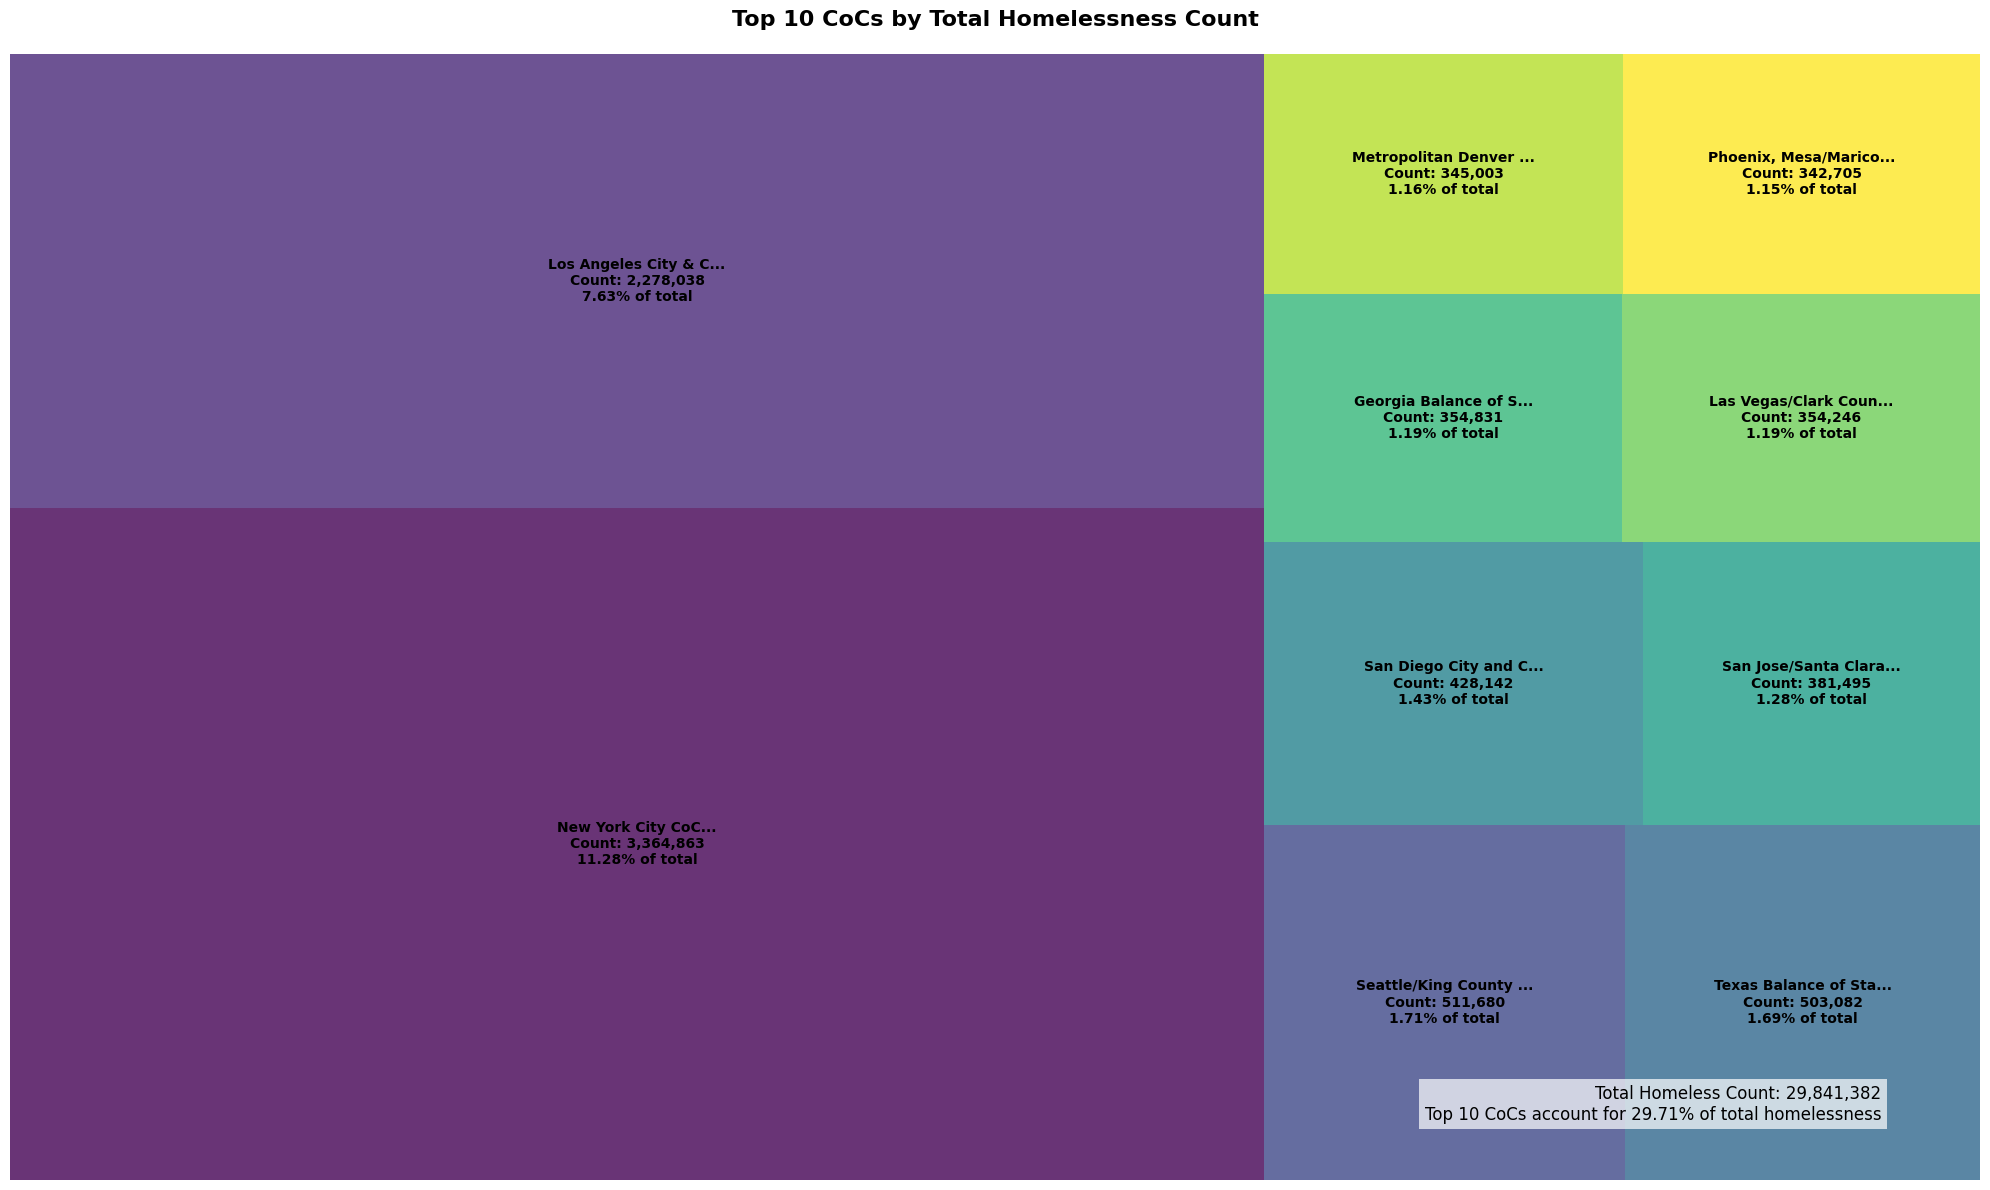

Number of CoCs: 400
Average homeless count per CoC: 74603.46
Median homeless count per CoC: 34677.00
CoC with highest homelessness: New York City CoC (3,364,863)
CoC with lowest homelessness: Hot Springs/South West Arkansas CoC (12)


In [144]:
coc_totals = df.groupby('CoC Name')['Count'].sum().sort_values(ascending=False)


total_homeless = coc_totals.sum()
coc_percentages = (coc_totals / total_homeless * 100).round(2)


fig, ax = plt.subplots(figsize=(20, 12))


colors = plt.cm.viridis(np.linspace(0, 1, 10))


squarify.plot(sizes=coc_totals.values[:10], 
              color=colors, 
              alpha=0.8, 
              ax=ax)


for i, (name, count, percentage) in enumerate(zip(coc_totals.index[:10], coc_totals.values[:10], coc_percentages[:10])):
    x, y, dx, dy = ax.patches[i].get_bbox().bounds
    ax.text(x + dx/2, 
            y + dy/2, 
            f"{name[:20]}...\nCount: {count:,}\n{percentage:.2f}% of total", 
            ha='center', 
            va='center', 
            fontsize=10, 
            fontweight='bold',
            wrap=True)


ax.set_title('Top 10 CoCs by Total Homelessness Count', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')


summary_text = f"Total Homeless Count: {total_homeless:,}\n"
summary_text += f"Top 10 CoCs account for {coc_percentages[:10].sum():.2f}% of total homelessness"
ax.text(0.95, 0.05, summary_text, 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))


plt.tight_layout()
plt.show()


print(f"Number of CoCs: {len(coc_totals)}")
print(f"Average homeless count per CoC: {coc_totals.mean():.2f}")
print(f"Median homeless count per CoC: {coc_totals.median():.2f}")
print(f"CoC with highest homelessness: {coc_totals.index[0]} ({coc_totals.values[0]:,})")
print(f"CoC with lowest homelessness: {coc_totals.index[-1]} ({coc_totals.values[-1]:,})")

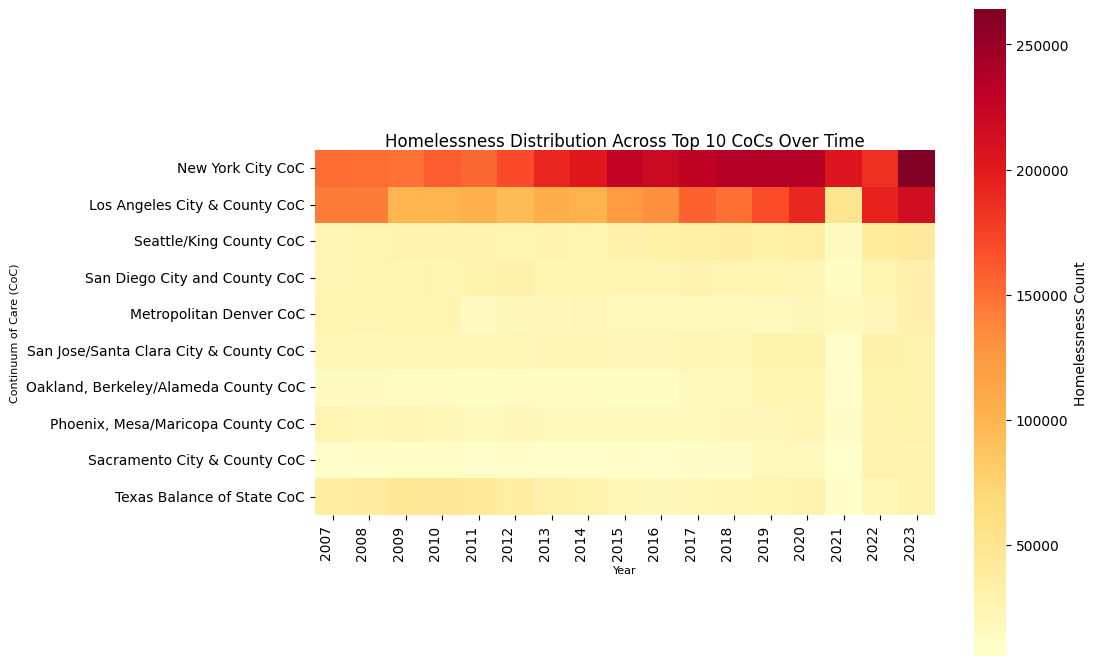

In [132]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
heatmap_data = df.pivot_table(values='Count', index='CoC Name', columns='Year', aggfunc='sum')

heatmap_data = heatmap_data.sort_values(by=heatmap_data.columns[-1], ascending=False)

top_10_cocs = heatmap_data.head(10)

plt.figure(figsize=(10, 12))

sns.heatmap(top_10_cocs, cmap='YlOrRd', square=True, cbar_kws={'shrink': 0.7, 'label': 'Homelessness Count', 'orientation': 'vertical'})

plt.title('Homelessness Distribution Across Top 10 CoCs Over Time', fontsize=12, pad=3)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Continuum of Care (CoC)', fontsize=8)

plt.xticks(rotation=90, ha='right')

plt.show()